In [ ]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline


# 사용자 운영체제 확인
import platform
platform.system()


# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [2]:
import pandas as pd
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [7]:
# text=pd.read_csv("ratings.txt", sep='\t', encoding='utf-8')

In [8]:
# df=text.copy()

In [11]:
# df

In [13]:
df=pd.read_table("ratings.txt")

In [14]:
trainData=df.copy()

In [18]:
trainData[-10:]

,id,document,label
199990,5465496,장르는 무협인데 내가 보기엔 코믹이던데 막장 평점 2점도 아깝다,0
199991,8965828,나치입장에서 본 영화가 갑자기 연속으로 나오네? 뭔일 있었나...,0
199992,2228930,태권도???,0
199993,417815,음 왜 봤을까? 예고편이 다 -,0
199994,4834376,개연성이 없어요.. 별루다...,0
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,3302770,쓰.레.기,0
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0
199999,8548411,포풍저그가나가신다영차영차영차,0


##### 퀴즈 1.
- null 값이 있는 행이 존재 하는지?
- null 값이 있는 행을 모두 출력

In [19]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        200000 non-null  int64 
 1   document  199992 non-null  object
 2   label     200000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [21]:
trainData[trainData.document.isnull()]

,id,document,label
46471,6369843,NaN,1
60735,511097,NaN,1
77665,2172111,NaN,1
84098,402110,NaN,1
127017,5942978,NaN,0
172375,5026896,NaN,0
173526,1034280,NaN,0
197279,1034283,NaN,0


In [28]:
trainData[trainData.isnull().any(axis=1)]

,id,document,label
46471,6369843,NaN,1
60735,511097,NaN,1
77665,2172111,NaN,1
84098,402110,NaN,1
127017,5942978,NaN,0
172375,5026896,NaN,0
173526,1034280,NaN,0
197279,1034283,NaN,0


In [23]:
trainData.isnull().sum()

id          0
document    8
label       0
dtype: int64

In [25]:
trainData.isnull().any() # null 이 있나?

id          False
document     True
label       False
dtype: bool

In [31]:
#null 값이 있는 행을 삭제
trainData.dropna(how='any', inplace=True) #null 값이 있는 행 전체가 제거
trainData[trainData.isnull().any(axis=1)] #지워진것을 확인

,id,document,label


In [32]:
len(trainData)

199992

In [38]:
trainData['document'][0] #문자열인것을 확인

'어릴때보고 지금다시봐도 재밌어요ㅋㅋ'

In [40]:
#문자열이어서 치환(replace) 를 하려면 str 붙여주어야한다.
trainData['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") #한글만 살리고 나머지는 제거
# [^] == Not
# [^ㄱ-ㅎㅏ-ㅣ가-힣 ] == 한글이 아닌것은 + 스페이스바
# ^[] == ~로 시작하는

0                                       어릴때보고 지금다시봐도 재밌어요ㅋㅋ
1         디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...
2                          폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고
3          와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지
4                                안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화
                                ...                        
199995                                         포켓 몬스터 짜가 ㅡㅡ
199996                                                  쓰레기
199997                      완전 사이코영화 마지막은 더욱더 이 영화의질을 떨어트린다
199998                  왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ
199999                                      포풍저그가나가신다영차영차영차
Name: document, Length: 199992, dtype: object

In [41]:
trainData['document']=trainData['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [42]:
#실제로는 더 많이 필요하다.
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [45]:
okt=Okt() #Okt를 이용한 형태소 분석 작업(토큰화)
# konlpy.org -> api -> Okt 클래스
tokenizedData=[]
for sentence in trainData['document']:
    tempX=okt.morphs(sentence, stem=True)
    tempX=[word for word in tempX if word not in stopwords]
    tokenizedData.append(tempX)
#문장이 거의 2만개라 진짜 오래걸린다.. 주의! 

- tokenizedData에 저장된 데이터에서
- 최대 길이, 평균 길이 출력, 시각화
- word2vec생성(window=5, min_count=5, size=100) 사이즈=임베딩벡터
- most_similar함수를 사용해서 한석규, 송강호, 공포
    - pos, neg 함수 사용해서 벡터연산해보기

In [46]:
tokenizedData

[['어리다', '때', '보고', '지금', '다시', '보다', '재밌다', 'ㅋㅋ'],
 ['디자인',
  '을',
  '배우다',
  '학생',
  '외국',
  '디자이너',
  '그',
  '일군',
  '전통',
  '을',
  '통해',
  '발전',
  '문화',
  '산업',
  '부럽다',
  '사실',
  '우리나라',
  '에서도',
  '그',
  '어렵다',
  '시절',
  '끝',
  '까지',
  '열정',
  '을',
  '지키다',
  '노라노',
  '같다',
  '전통',
  '있다',
  '저',
  '같다',
  '사람',
  '꿈',
  '을',
  '꾸다',
  '이루다',
  '나가다',
  '수',
  '있다',
  '것',
  '감사하다'],
 ['폴리스스토리', '시리즈', '부터', '뉴', '까지', '버리다', '하나', '없다', '최고'],
 ['오다',
  '연기',
  '진짜',
  '개',
  '쩔다',
  '지루하다',
  '생각',
  '몰입',
  '보다',
  '그렇다',
  '이렇다',
  '진짜',
  '영화',
  '지'],
 ['안개', '자욱하다', '밤하늘', '뜨다', '있다', '초승달', '같다', '영화'],
 ['사랑', '을', '해보다', '사람', '라면', '처음', '부터', '끝', '까지', '웃다', '있다', '영화'],
 ['완전', '감동', '이다', '다시', '보다', '감동'],
 ['개', '전쟁', '나오다', '나오다', '빠', '로', '보고', '싶다'],
 ['굿'],
 ['바보', '아니다', '병', '쉰', '이다'],
 ['내',
  '나이',
  '같다',
  '영화',
  '지금',
  '보다',
  '나',
  '감동',
  '적',
  '이다',
  '하지만',
  '훗날',
  '다시',
  '보다',
  '사하나',
  '하',
  '나',
  '그',
  '감정',
  '을',
  '완벽하다',
  '이해',

In [48]:
len(tokenizedData) #문장의 개수

199992

In [54]:
# 최대 길이
print(len(max(tokenizedData, key=len)))

72


In [56]:
print(max(tokenizedData, key=len))

['내', '평점', '쓰레기', '임', '진심', '평점', '주다', '더', '만일분', '만에', '삭제', '댓', '음', '티비', '서', '내', '돈', '주', '고만', '원', '내', '고', '제', '돈', '주다', '내', '평썻더', '만', '삭제', 'ㅎ', '답', '없다', '본', '친구', '폰', '다시', '적다', '내', '영화', '사랑', '하', '지만', '영화', '보다', '서너', '무', '화', '가나', '서', '처음', '써다', '봄', '정말', '핫', '바리', '영화', '다', '알바', '수고', '다시다', '간평', '지우다', '피해자', '일인', '돈', '아깝다', 'ㅡㅡ', '평점', '싫다', '환불', '해', '라']


In [60]:
# 평균 길이 출력
total_avg = sum( map(len, tokenizedData) ) / len(tokenizedData)
total_avg

10.716703668146726

In [64]:
# word2vec생성(window=5, min_count=5, size=100) 사이즈=임베딩벡터
from gensim.models import Word2Vec

In [66]:
model=Word2Vec(sentences=tokenizedData, size=100, window=5, min_count=5, sg=1, workers=4) #0: cbow, 1:skipgram / workers = 프로세서 개수
# - CBOW : 주변 단어들 -> 중간 단어 예측
# - skip-gram : 중간단어 -> 주변 단어 예측 

In [73]:
# most_similar함수를 사용해서 한석규, 송강호, 공포
# pos, neg 함수 사용해서 벡터연산해보기
model.wv.most_similar("한석규")

[('안성기', 0.9133159518241882),
 ('김갑수', 0.8858447074890137),
 ('류덕환', 0.8742349147796631),
 ('임원희', 0.8711392283439636),
 ('김창완', 0.8615526556968689),
 ('설경구', 0.8612380623817444),
 ('김민희', 0.8565277457237244),
 ('문소리', 0.8530081510543823),
 ('정재영', 0.8516509532928467),
 ('김승우', 0.8500148057937622)]

In [74]:
model.wv.most_similar("송강호")

[('류덕환', 0.8476523756980896),
 ('한석규', 0.8472946882247925),
 ('안성기', 0.8471120595932007),
 ('유해진', 0.8433215618133545),
 ('류승범', 0.8345149755477905),
 ('이주승', 0.833856999874115),
 ('김윤석', 0.8326295614242554),
 ('김혜수', 0.8320293426513672),
 ('이문식', 0.8286765217781067),
 ('주진모', 0.8285540342330933)]

In [75]:
model.wv.most_similar("공포")

[('스릴러', 0.8340035676956177),
 ('공포영화', 0.8063150644302368),
 ('미스테리', 0.7466860413551331),
 ('호러', 0.7265023589134216),
 ('공포물', 0.7222608327865601),
 ('미스터리', 0.7189168930053711),
 ('서스펜스', 0.7085041403770447),
 ('스릴러물', 0.6885687112808228),
 ('장르', 0.6733672022819519),
 ('긴장감', 0.6699384450912476)]

In [76]:
model.wv.most_similar(positive=["한석규", "공포"])

[('시가전', 0.7937158346176147),
 ('ㅎㄷㄷㄷ', 0.786919116973877),
 ('테크노', 0.7862463593482971),
 ('미쟝센', 0.786045253276825),
 ('캐머런', 0.784167468547821),
 ('배우진', 0.7803044319152832),
 ('김영애', 0.7770038843154907),
 ('하반기', 0.7756527662277222),
 ('다듬어지다', 0.7749743461608887),
 ('정치드라마', 0.7749698162078857)]

In [77]:
model.wv.most_similar(positive=["송강호", "공포"])

[('미쟝센', 0.7781568765640259),
 ('퍼포먼스', 0.777515709400177),
 ('ㅎㄷㄷㄷ', 0.7676470279693604),
 ('존트라볼타', 0.7675516605377197),
 ('로다주', 0.7595723271369934),
 ('테크노', 0.757133960723877),
 ('창의력', 0.7559257745742798),
 ('골드버그', 0.7540513873100281),
 ('시가전', 0.7533146739006042),
 ('스틸컷', 0.7532110810279846)]

In [88]:
model.wv.most_similar(positive=["공포"], negative=["송강호","코메디"])

[('밤', 0.0726037472486496),
 ('흔들다', 0.06223004311323166),
 ('잠', 0.04666746407747269),
 ('분노', 0.041448887437582016),
 ('새벽', 0.0403822585940361),
 ('고통', 0.032096266746520996),
 ('거울', 0.019171064719557762),
 ('벽', 0.017768494784832),
 ('일어나다', 0.011404899880290031),
 ('못자다', 0.01138230413198471)]

In [90]:
from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from gensim.models import KeyedVectors

# 출처: https://joyhong.tistory.com/133 [옳은 길로..]

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [91]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처 
mpl.rcParams['axes.unicode_minus'] = False 

plt.rc('font', family='D2Coding') 
def show_tsne(): 
    tsne = TSNE(n_components=2) 
    X = tsne.fit_transform(X_show) 
    df = pd.DataFrame(X, index=vocab_show, columns=['x', 'y']) 
    fig = plt.figure() 
    fig.set_size_inches(30, 20) 
    ax = fig.add_subplot(1, 1, 1) 
    ax.scatter(df['x'], df['y']) 
    
    for word, pos in df.iterrows(): 
        ax.annotate(word, pos, fontsize=10) 
    plt.xlabel("t-SNE 특성 0") 
    plt.ylabel("t-SNE 특성 1") 
    plt.show()

def show_pca(): # PCA 모델을 생성합니다 
    pca = PCA(n_components=2) 
    pca.fit(X_show) # 처음 두 개의 주성분으로 숫자 데이터를 변환합니다 
    x_pca = pca.transform(X_show) 
    plt.figure(figsize=(30, 20)) 
    plt.xlim(x_pca[:, 0].min(), x_pca[:, 0].max()) 
    plt.ylim(x_pca[:, 1].min(), x_pca[:, 1].max()) 
    for i in range(len(X_show)): 
        plt.text(x_pca[i, 0], x_pca[i, 1], str(vocab_show[i]), 
                 fontdict={'weight': 'bold', 'size': 9}) 
    plt.xlabel("첫 번째 주성분") 
    plt.ylabel("두 번째 주성분") 
    plt.show()

In [92]:
vocab = list(model.wv.vocab) 
X = model[vocab]

<ipython-input-92-947648344e38>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[vocab]


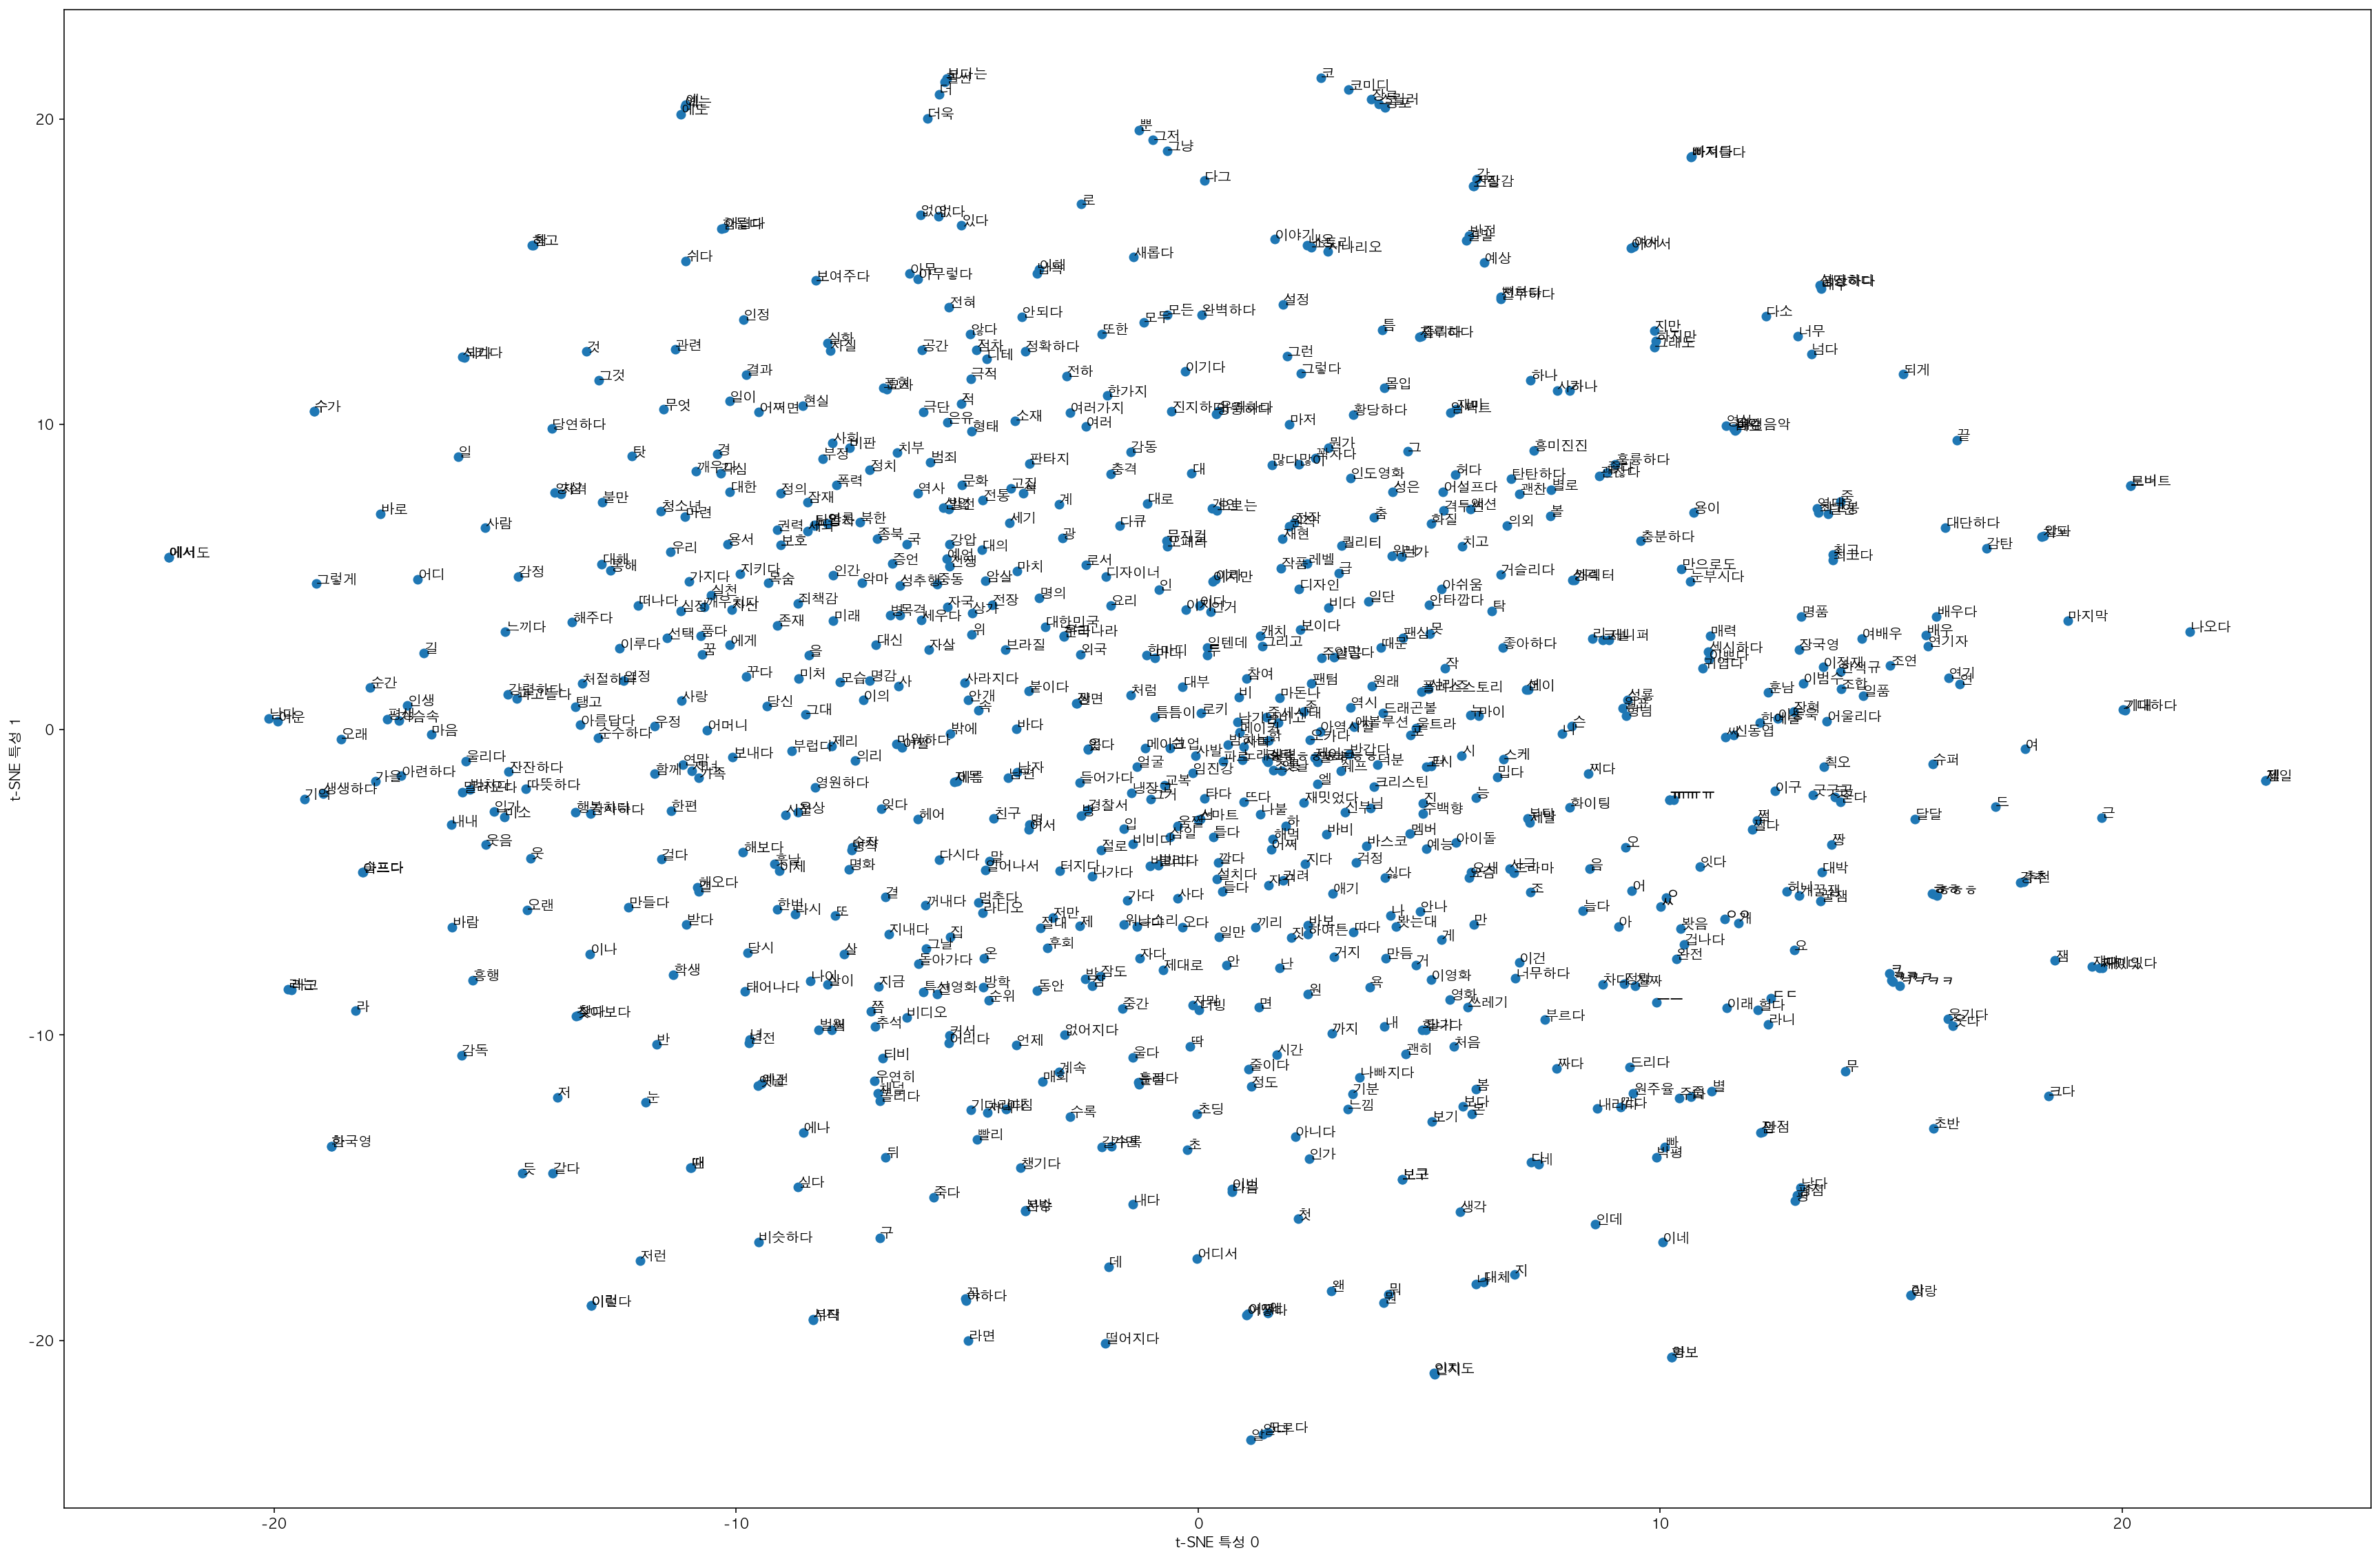

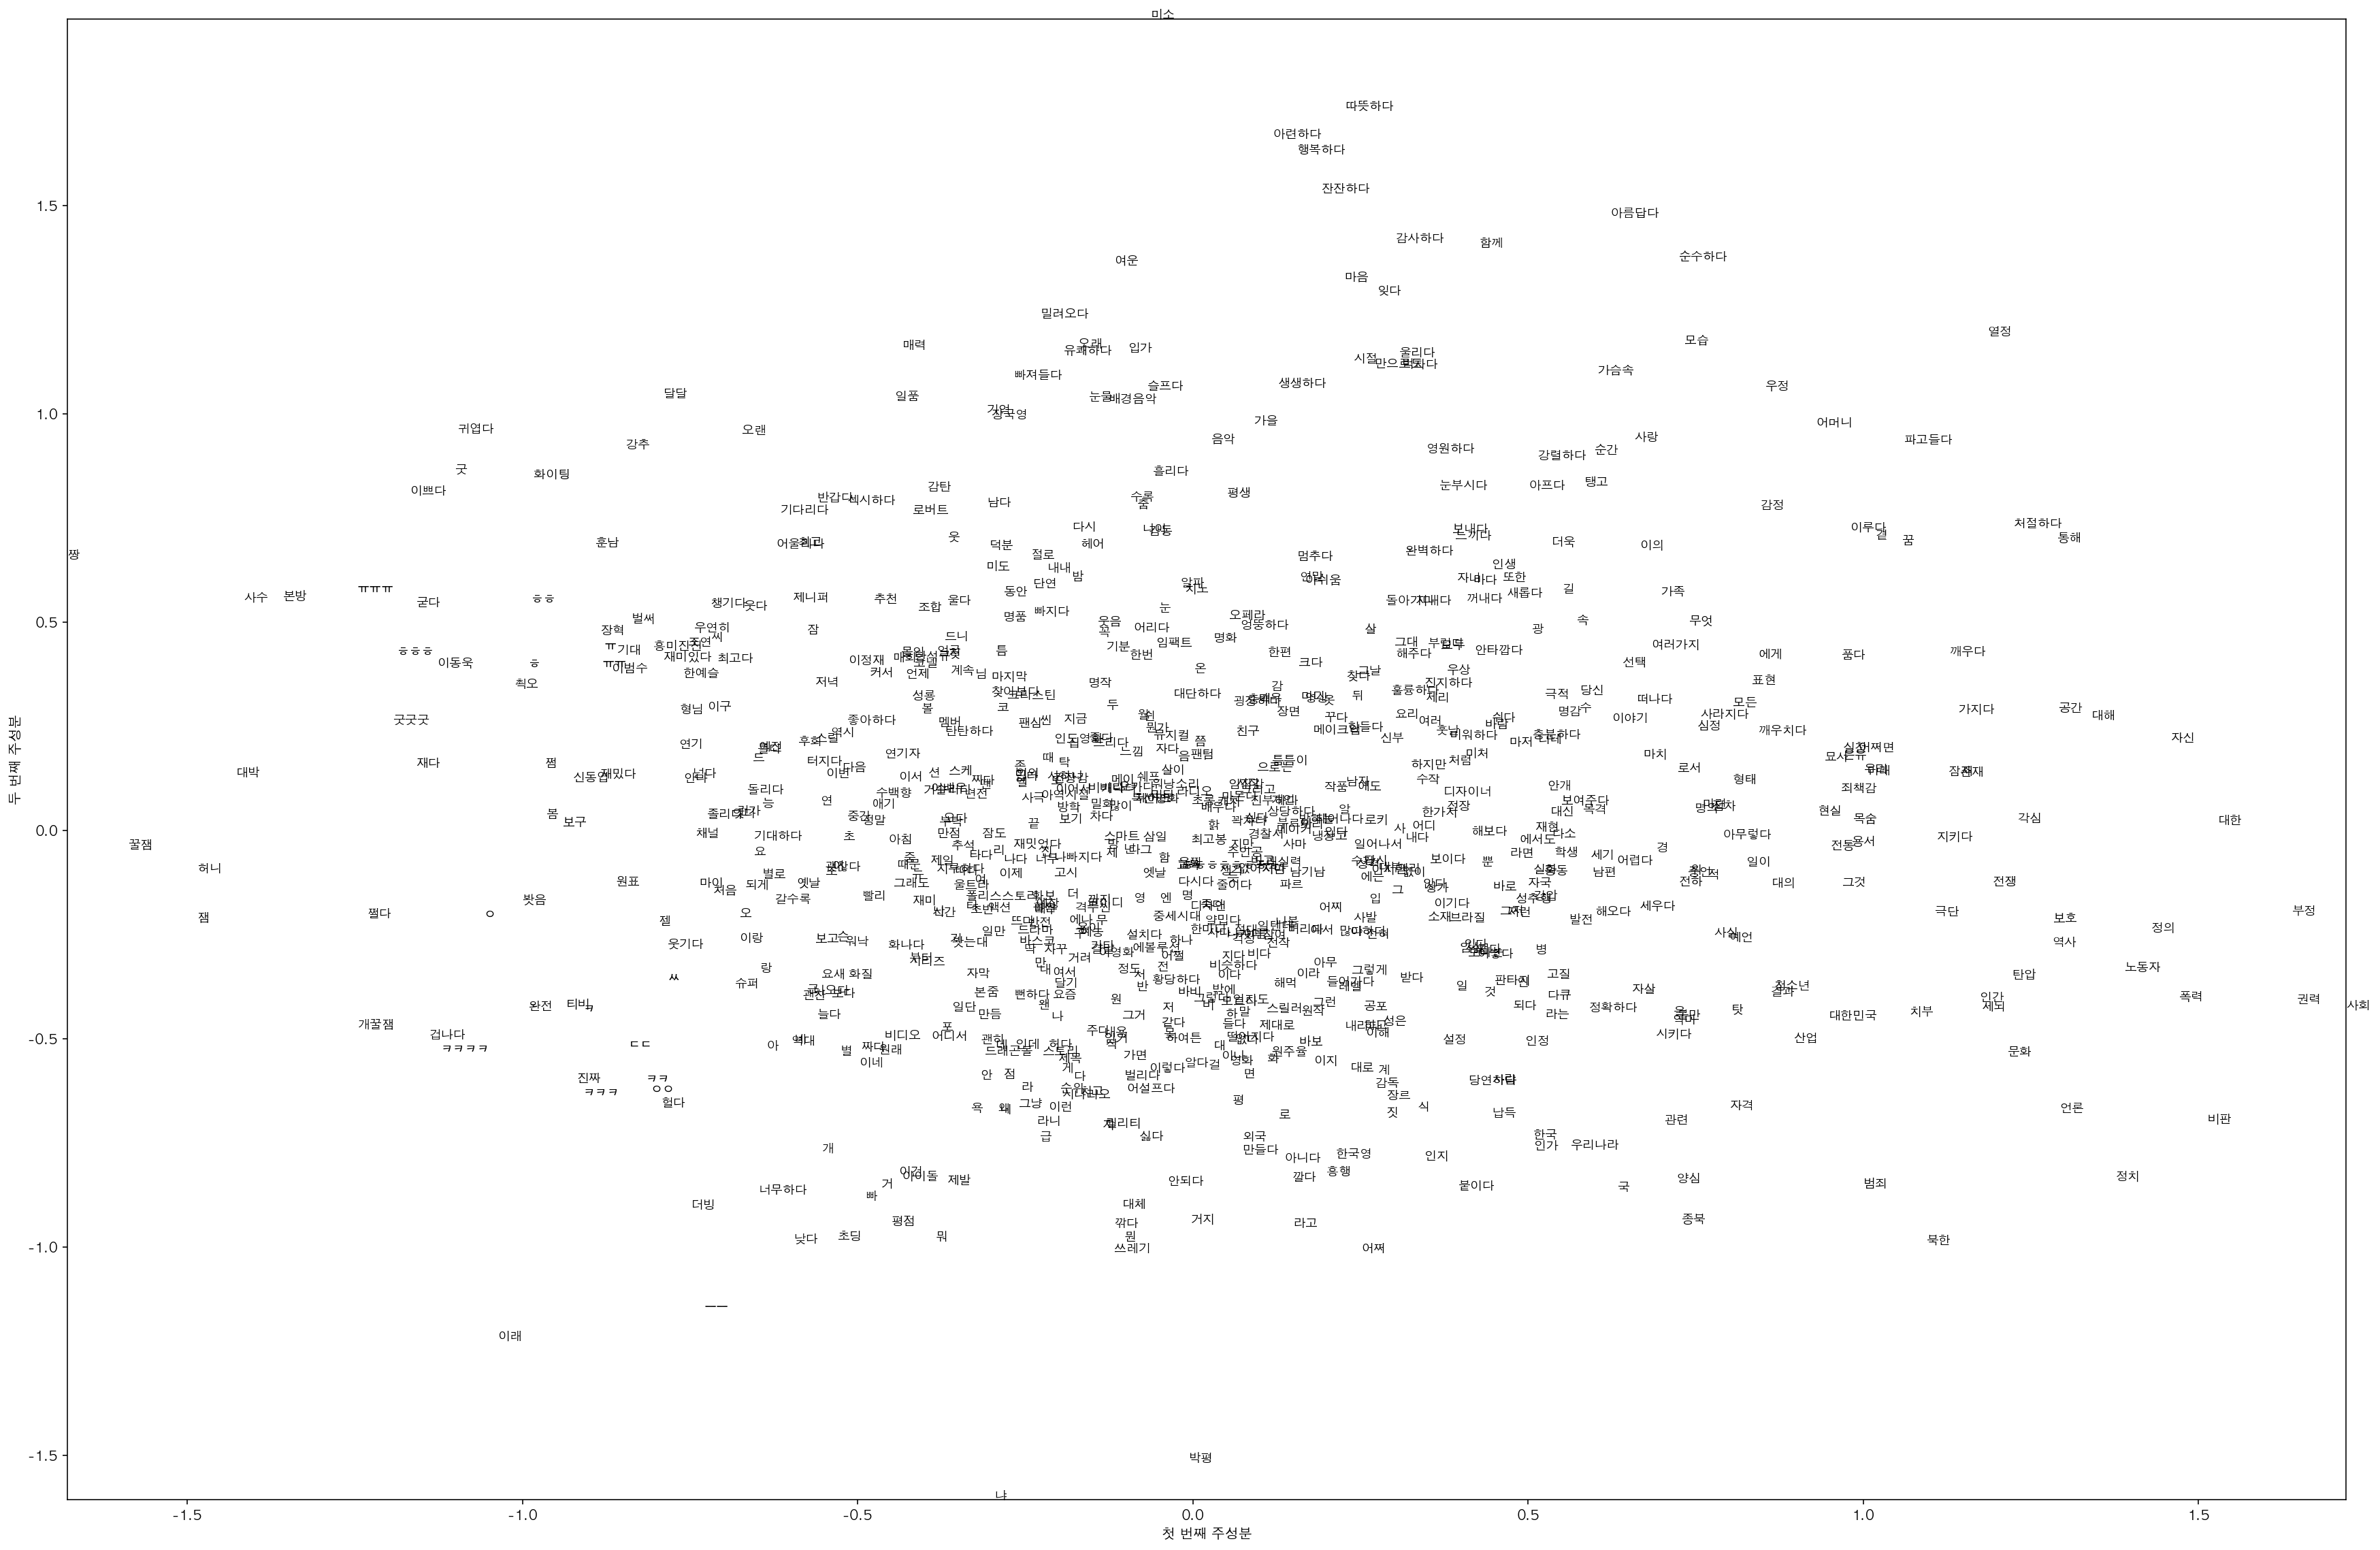

In [94]:
# sz개의 단어에 대해서만 시각화 
sz = 800 
X_show = X[:sz,:] 
vocab_show = vocab[:sz] 

show_tsne() 
show_pca()

In [99]:
from gensim.models import KeyedVectors
model.wv.save_word2vec_format('ratings_w2v')

In [ ]:
# 파이썬 2.7이 있어야하는듯.. 
# 코랩에서 하면 될듯

In [101]:
!python -m gensim.scripts.word2vec2tensor –input ratings_w2v –output ratings_w2v

/System/Library/Frameworks/Python.framework/Versions/2.7/Resources/Python.app/Contents/MacOS/Python: No module named gensim.scripts


# how to
https://soohee410.github.io/embedding_projector
# embedding projector site
https://projector.tensorflow.org

In [105]:
!python -m gensim.scripts.word2vec2tensor --input word2vec --output word2vec

/System/Library/Frameworks/Python.framework/Versions/2.7/Resources/Python.app/Contents/MacOS/Python: No module named gensim.scripts
